<a href="https://colab.research.google.com/github/Lunar047/Collab/blob/main/day_20_fourier_transform_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to load an image from a specified path
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    else:
        raise FileNotFoundError(f"No image found at path: {path}")

# Function to display an image, its Fourier Transform, and 1D projections
def display_image_and_fft_with_projections(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply FFT and shift the zero frequency component to the center
    fft = np.fft.fft2(gray_image)
    fft_shift = np.fft.fftshift(fft)

    # Calculate magnitude spectrum for visualization
    magnitude_spectrum = np.log(np.abs(fft_shift) + 1) # Log scale for better visibility

    # 1D Projections (Summation across rows and columns)
    horizontal_projection = np.sum(magnitude_spectrum, axis=0)
    vertical_projection = np.sum(magnitude_spectrum, axis=1)

    # Frequency units for the axes
    num_rows, num_cols = gray_image.shape
    freq_x = np.fft.fftfreq(num_cols, d=1.0)
    freq_y = np.fft.fftfreq(num_rows, d=1.0)
    freq_x = np.fft.fftshift(freq_x) # Shift zero freq to center
    freq_y = np.fft.fftshift(freq_y) # Shift zero freq to center

    # Display the original image, its Fourier Transform, and 1D projections
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')

    plt.subplot(2, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray', extent=[freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()])
    plt.title('Fourier Transform (Magnitude Spectrum)')
    plt.xlabel('Frequency (cycles per pixel width)')
    plt.ylabel('Frequency (cycles per pixel height)')
    plt.colorbar(label='Log Magnitude')

    plt.subplot(2, 2, 3)
    plt.plot(freq_x, horizontal_projection)
    plt.title('Horizontal Frequency Projection')
    plt.xlabel('Frequency (cycles per pixel width)')
    plt.ylabel('Magnitude')

    plt.subplot(2, 2, 4)
    plt.plot(freq_y, vertical_projection)
    plt.title('Vertical Frequency Projection')
    plt.xlabel('Frequency (cycles per pixel height)')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

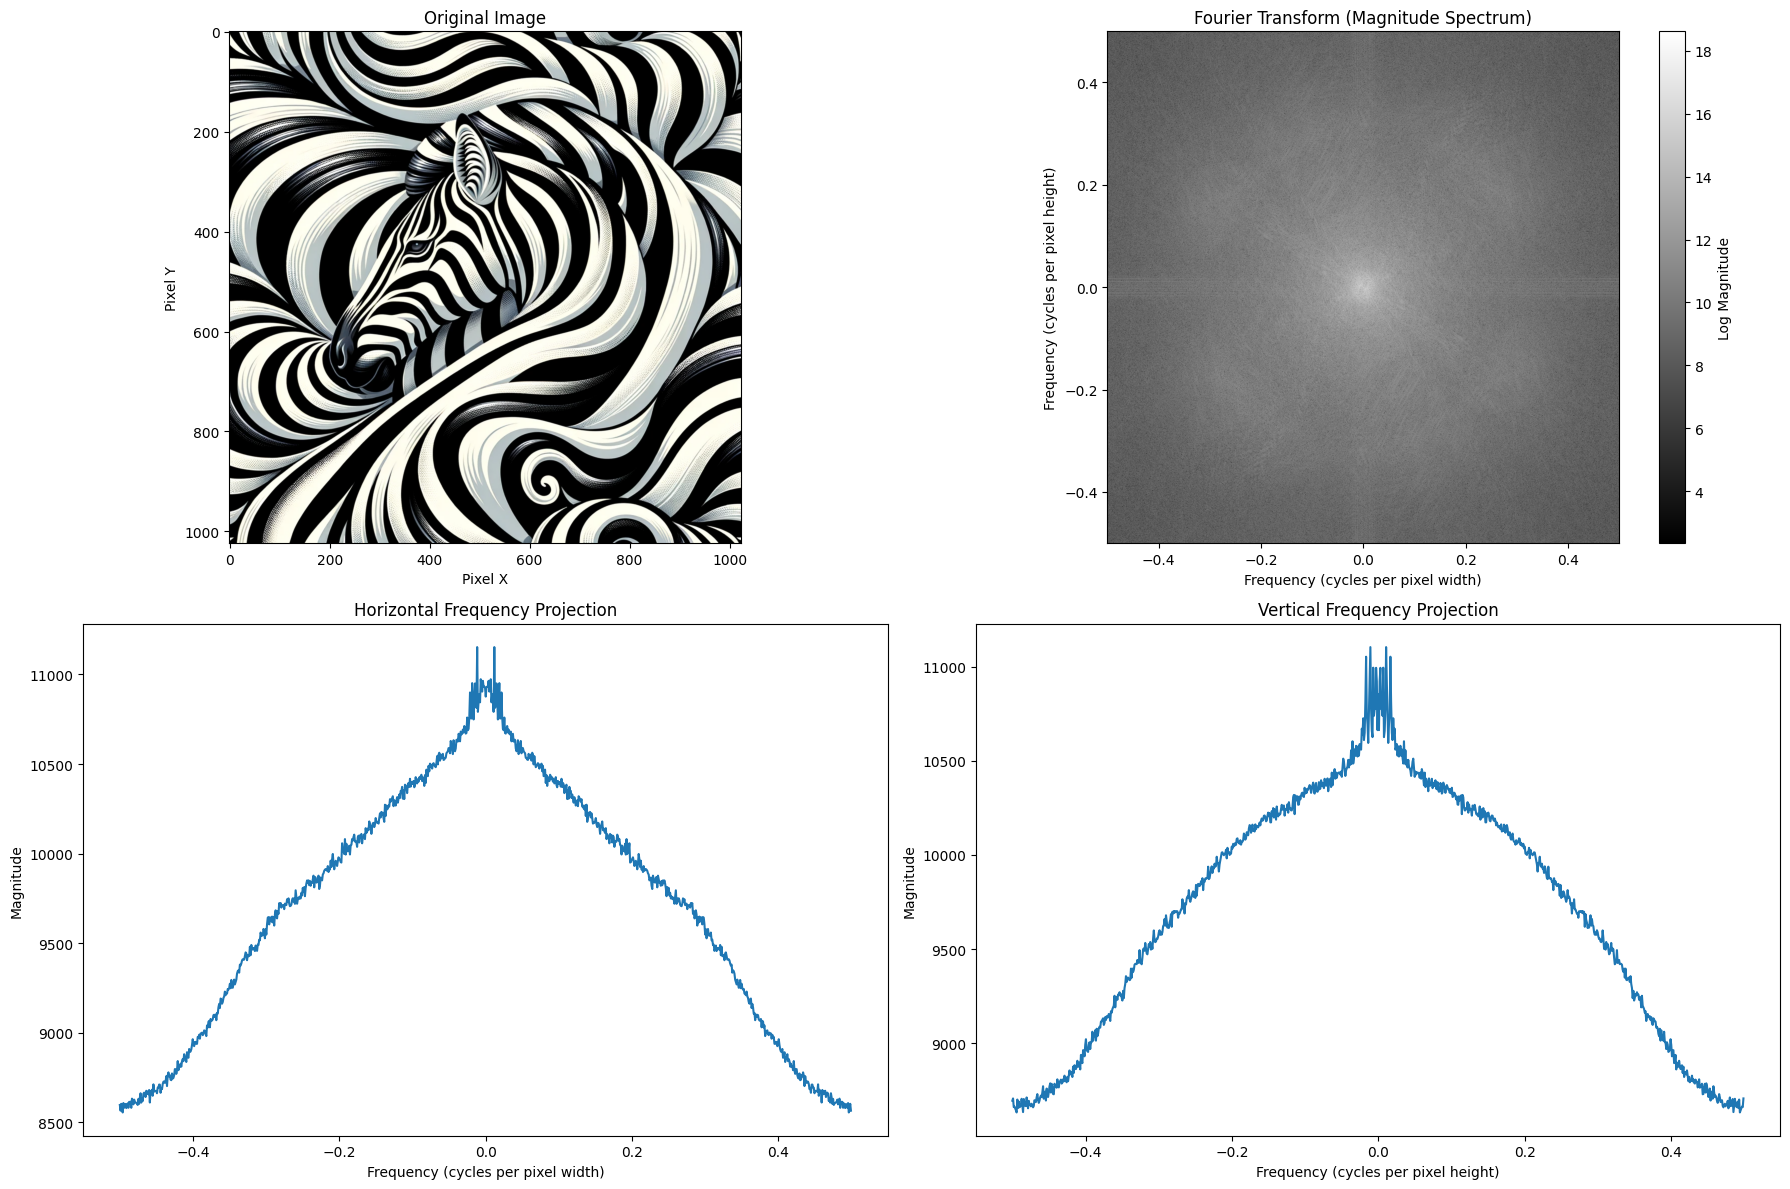

In [ ]:
image_1 = load_image("/content/zebra.png")
display_image_and_fft_with_projections(image_1)

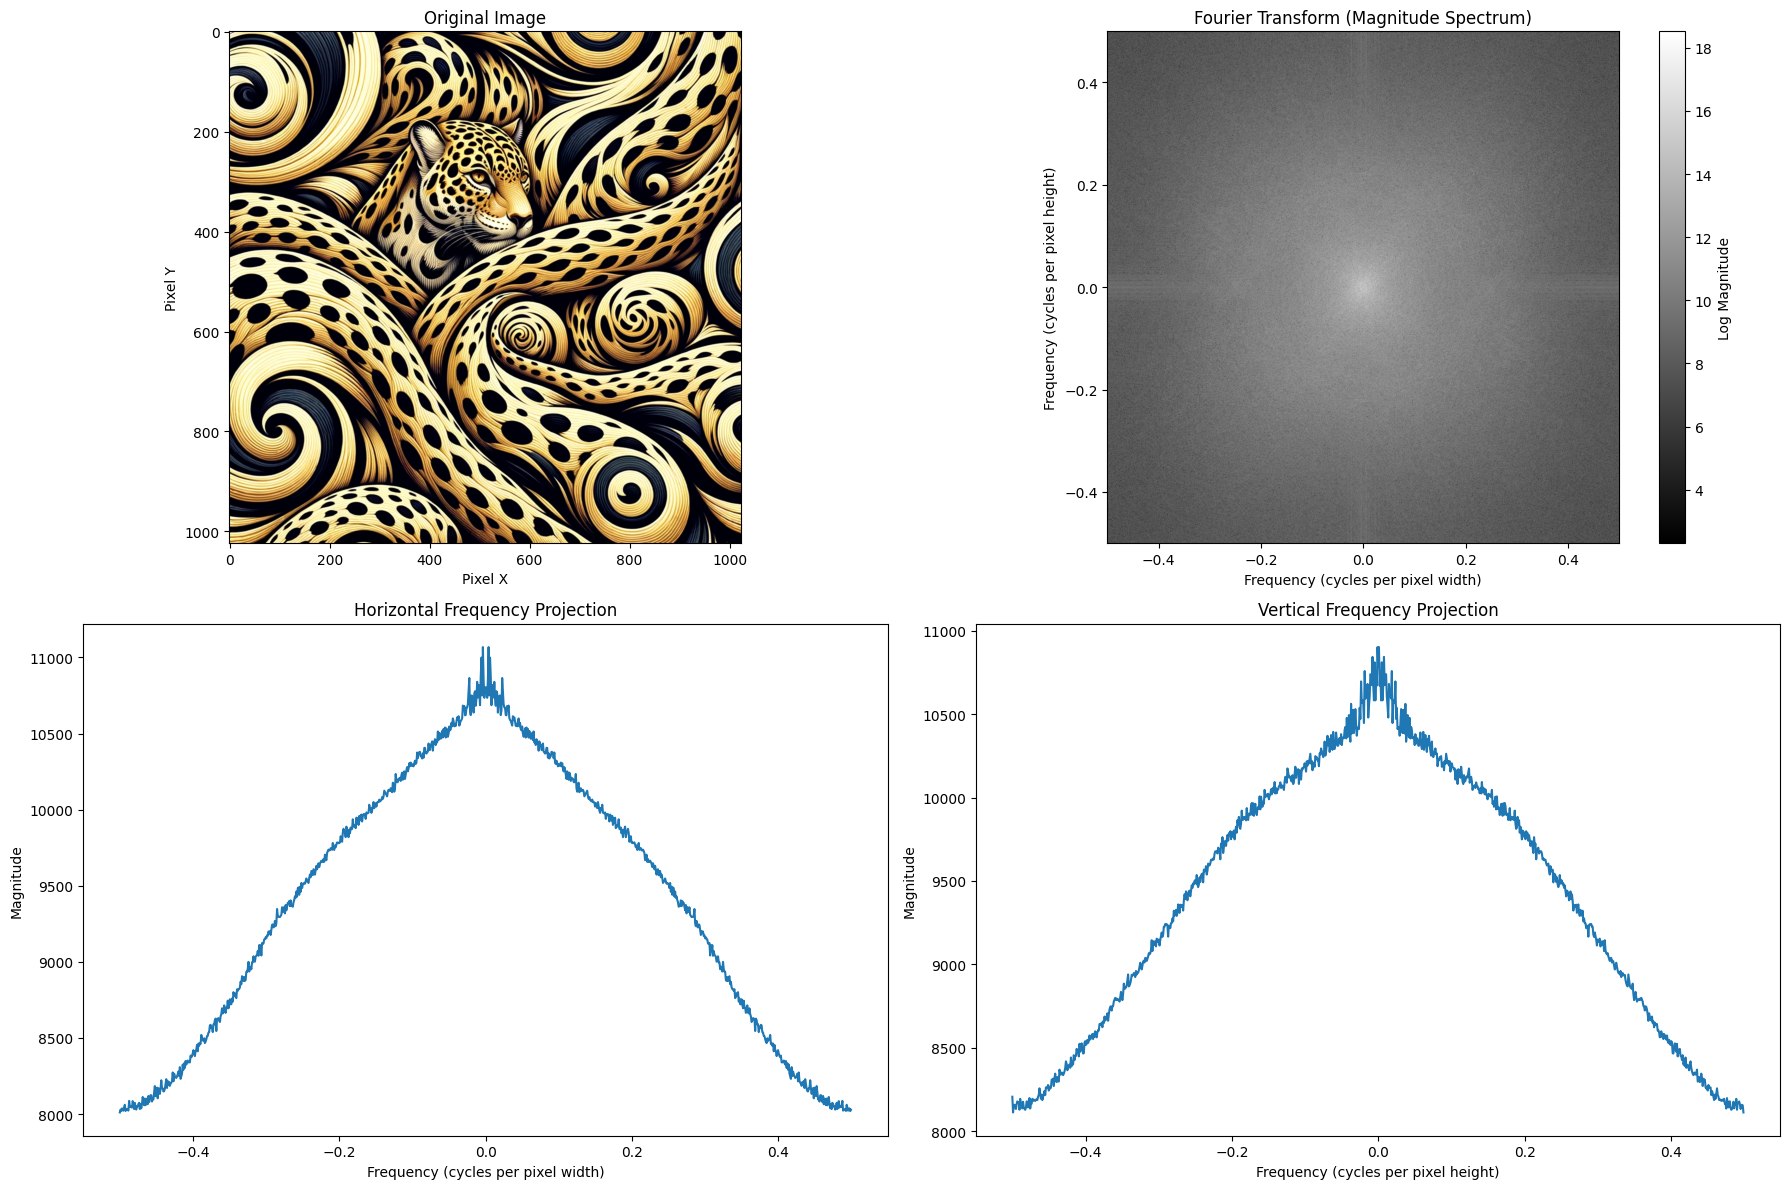

In [ ]:
image_2 = load_image("/content/jaguar.png")
display_image_and_fft_with_projections(image_2)

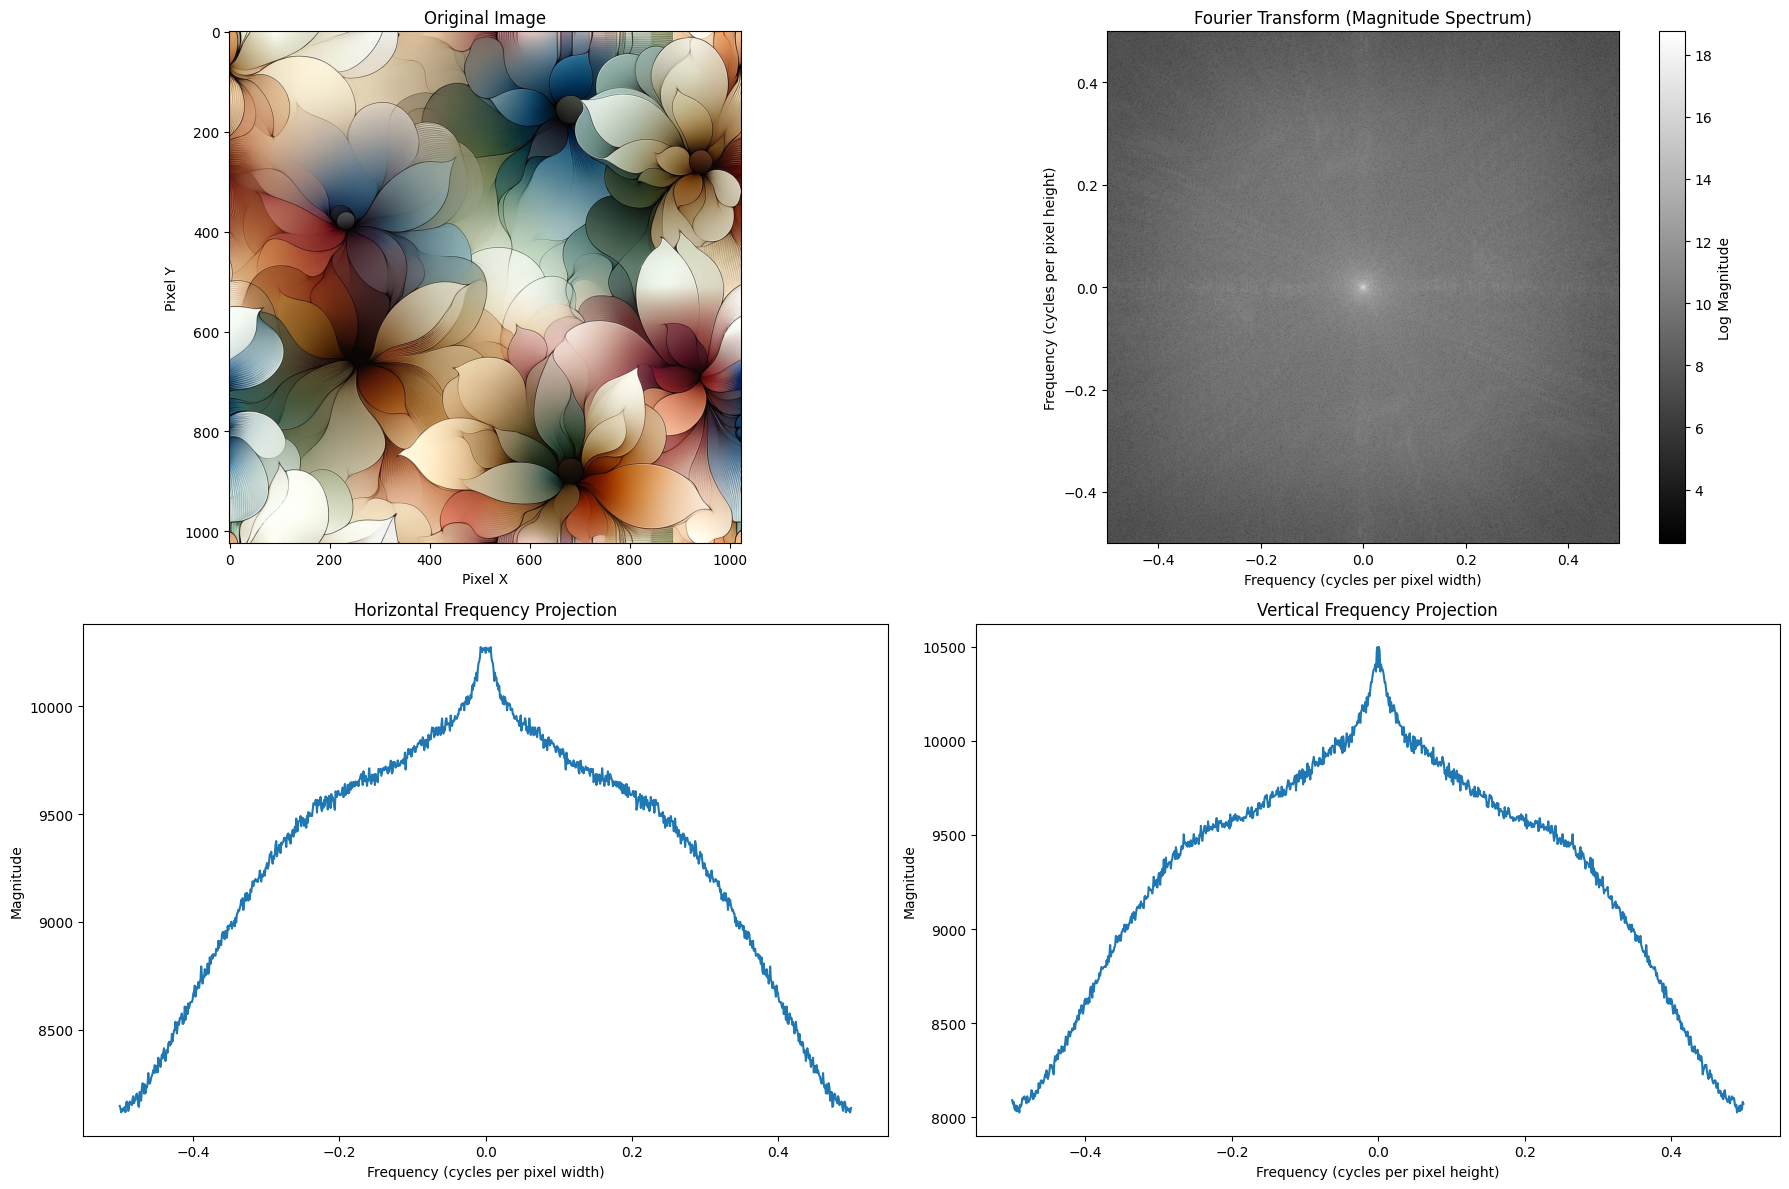

In [ ]:
image_3 = load_image("/content/flowers.png")
display_image_and_fft_with_projections(image_3)

In [ ]:
# prompt:

# Load and display another image
image_4 = load_image("/content/elephant.png")
display_image_and_fft_with_projections(image_4)
